# Seminarundervisning: Elektrisk felt

**Anders Malthe-Sørenssen**, Department of Physics, University of Oslo, Norway

Date: **Aug 30, 2022**



### Læringsmål

Kunne bruke Coulombs lov til å finne det elektriske feltet for diskrete og kontinuerlige ladningsfordelinger. Mestre bruk av $\vec{R}$-vektor for diskrete og kontinuerlige ladningsfordelinger. Kjenne igjen grunnleggende symmetrier og bruke disse til å forenkle problemstillinger.


<div class="alert alert-block alert-info">

## Teori: Introduksjon til elektrisk felt

Elektriske ladninger danner elektriske felt i rommet.

Det elektriske feltet $\vec{E}(\vec{r})$ i punktet $\vec{r}$ fra en ladning $Q$ som er plassert i posisjonen $\vec{r}'$ er

$$
\begin{equation}
\vec{E} = \frac{Q}{4 \pi \epsilon_0} \frac{\hat{R}}{R^2} \; ,
\label{_auto1} \tag{1}
\end{equation}
$$

hvor $\vec{R} = \vec{r} - \vec{r}'$. Vi kaller punktet $\vec{r}$ for *observasjonspunktet*. Vektoren $\vec{R}$ går fra ladningen $Q$ til observasjonspunktet: $\vec{R} = \vec{r} - \vec{r}'$.

Hvis du er i tvil om retningen på $\vec{R}$ eller $\hat{R}$ peker mot eller vekk fra observasjonspunktet, kan du tenke på at det er retningen på kraften på en positiv ladning i observasjonspunktet.

</div>

## Klikkeroppgave: Ladninger på en linje


## Oppgave: Feltet fra en enkelt ladning

Vi plasserer en ladning $+Q$ i punktet $(a,0)$ som vist i figuren.

<!-- dom:FIGURE:[fig-electricfield/activelearning-field011.png, width=300] -->
<!-- begin figure -->

<p></p>
<img src="fig-electricfield/activelearning-field011.png" width=300>

<!-- end figure -->





**a)**
Skisser retning og størrelse på det elektriske feltet i punktene markert med en $x$ i figuren.

*(Du kan legge inn et bilde her ved å velge Edit->Insert Image)*

**b)**
Tegn inn $\vec{R}$-vektor som du ville bruke til å finne det elektriske feltet fra ladningen $Q$ i punktene markert i figuren.

*(Du kan lage en ny celle under denne ved å trykke på +-tegnet under "File". Velg hva slags type denne cellen skal være ved å endre den fra "Code" til "Markdown" slik at det du skriver tolkes som tekst.)*

## Oppgave: Felt og $\vec{R}$-vektor for en enkelt ladning

En ladning $-Q$ er plassert i origo.

**a)**
Tegn inn $\vec{R}$-vektoren som du vil bruke til å finne det elektriske feltet fra ladningen i punktet $(1,0)$.

**b)**
Finn det elektriske feltet i punktet $(1,1)$.

## Oppgave: Feltet fra fire ladninger

Fire ladninger er plassert i $xy$-planet. Ladningen $Q_1 = +Q$ i $\vec{r}_1=(a,a)$, ladningen $Q_2 = +Q$ i $\vec{r}_2=(-a,-a)$, ladningen $Q_3 = -Q$ i $\vec{r}_3=(-a,a)$ og ladningen $Q_4 = -Q$ i $\vec{r}_4=(a,-a)$.

**a)**
Lag en tegning av systemet. Skisser det elektriske feltet i noen punkter.

**b)**
Tegn inn $\vec{R}$-vektorene du vil bruke for å finne det elektriske feltet i punktet $(a,0)$. Hvilken retning vil det elektriske feltet ha her?

**c)**
Skisser det elektriske feltet langs $x$-aksen. (Du skal ikke regne det ut ennå, men skissere det)

Vi skal nå visualisere feltet i $xy$-planet. Du har fått oppgitt følgende program som regner ut feltet fra en enkelt ladning.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#
def efieldlist(r,Q,R):
# Find E*4*pi*epsilon0 at r from a charge q at position r0 
    E = np.zeros(np.shape(r))
    for i in range(len(R)):
        Ri = r - R[i]
        qi = Q[i]
        Rinorm = np.linalg.norm(Ri)
        E = E + qi*Ri/Rinorm**3
    return E
#
def findfield(R,Q,x0,x1,y0,y1,Nx,Ny): 
    x = np.linspace(x0,x1,Nx)
    y = np.linspace(y0,y1,Ny)
    rx,ry = np.meshgrid(x,y)
    # Set up electric field
    Ex = np.zeros((Nx,Ny),float)
    Ey = np.zeros((Nx,Ny),float) 
    # Calculate the field
    for i in range(len(rx.flat)):
        r = np.array([rx.flat[i],ry.flat[i]])
        Ex.flat[i],Ey.flat[i] = efieldlist(r,Q,R) 
    return x,y,rx,ry,Ex,Ey

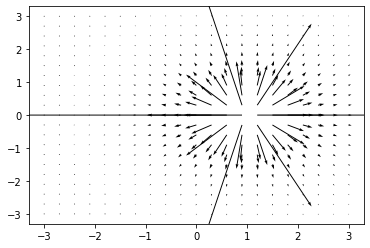

In [3]:
R = []
Q = []
r0 = np.array([1,0])
q0 = 1
R.append(r0)
Q.append(q0)
L = 3 # Grid goes from -L to L in x and y directions 
N = 21 # Number of grid points in x and y directions 
x,y,rx,ry,Ex,Ey = findfield(R,Q,-L,L,-L,L,N,N)
plt.quiver(rx,ry,Ex,Ey)

**d)** Utvid programmet slik at det regner ut og viser feltet for de fire ladningene.

**e)** Hvordan kan du regne ut feltet langs $x$-aksen for å teste skissen din?

<div class="alert alert-block alert-success">

# Måleenhet for elektrisk feltstyrke

Vi måler elektrisk feltstyrke i Newton per Coulomb, $\text{N/C}$. Det er en størrelse som er litt upraktisk fordi vi ikke noe særlig intuisjon for størrelsen på en Coulomb. 

I stedet kan vi bruke Volt per meter. En Volt er definert som en Newton meter per Coulomb, $1 \text{V} = 1 \text{Nm/C}$. Spenning (elektrisk potensial) som vi måler i Volt skal vi lære mer om neste uke, men vi har alle en viss intuisjon for spenning fra batterier, ledningsnettet hjemme og høyspentkabler.

</div>

## Oppgave: Statisk elektrisk sjokk

Du går bortover et syntetisk teppe med dine nye ullsokker. Du vet at det pleier å føre til at du får støt når du tar på pulten din. Du fører derfor pekefingeren langsomt ned mot bordet. Når den er 2 cm fra bordflaten ser du en liten gnist og du kjenner det stikker i fingeren. Hvor mye ladning tror du det var på fingeren din?

Vi skal prøve å komme fram til et overslag for dette ved å lage en modell for denne situasjonen og så regne på denne modellen.

Vi vet at det blir en gnist hvis det elektriske feltet i luften blir større enn $3 \text{MV/m} = 3 \, 10^{6}\text{V/m}$. (Vi skal lære mer om hva som skjer når det dannes gnister eller lyn senere).

**a)** Din venn Kari har en modell hun vil bruke. 

"Vi modellerer overflaten på fingeren din som et stort plan med en jevnt fordelt ladning $Q$ fordelt på overflaten $S$. Jeg har slått opp og funnet ut at for en uendelig stor overflate er det elektriske feltet $E = (Q/A)/(2\epsilon_0)$ med retning normalt på overflaten."

Synes du dette er en rimelig modell? Kan vi bruke denne modellen til å finne ladningen på fingeren din?

**b)** "Nei", sier din venninne Hilde. "Det er en for enkel modell. Jeg har funnet ut at det elektriske feltet i en avstand $z$ fra en sirkulær skive med radius $a$ og ladningstetthet $(Q/A)$ er 

$$E = \frac{(Q/A)}{2 \epsilon_0} \left( 1 - \frac{z}{(a^2 + z^2)^{1/2}}\right)$$

Dette kan vi bruke til å finne ladningen på fingeren din".

Hvordan kan du bruke dette til å finne ladningen? Finn ladningen. 

(Du kan anta at uttrykket som Hilde har funnet er korrekt. Vi skal finne dette uttrykket i en hjemmeoppgave.)


<div class="alert alert-block alert-info">

## Teori: Introduksjon til kontinuerlige ladningsfordelinger

Vi beskriver en kontinuerlig ladningsfordeling ved hjelp av en ladningtetthet $\rho(\vec{r})$.

Det elektriske feltet i et punkt $\vec{r}$ fra en ladningsfordeling $\rho$ i volumet $v$ er gitt som
$$
\begin{equation}
\vec{E}(\vec{r}) = \int_v \frac{\rho(\vec{r}')}{4\pi \epsilon_0} \frac{\hat{R}}{R^2} d v' \; ,
\end{equation}
$$
hvor $\vec{R} = \vec{r} - \vec{r}'$.

Tilsvarende for en overflateladningstetthet $\rho_S$ og en linjeladningstetthet $\rho_l = \lambda$:
$$
\begin{equation}
\vec{E}(\vec{r}) = \int_S \frac{\rho_S(\vec{r}')}{4\pi \epsilon_0} \frac{\hat{R}}{R^2} d S' \; ,
\end{equation}
$$
og
$$
\begin{equation}
\vec{E}(\vec{r}) = \int_C \frac{\rho_l(\vec{r}')}{4\pi \epsilon_0} \frac{\hat{R}}{R^2} d l' \; .
\end{equation}
$$
</div>

## Klikkeroppgave: Kuleformet ladning

En ladning $Q$ er jevnt fordelt i en kule med radius $R$. Hvilken figur representerer ladningsfordelingen $\rho(z)$ langs $z$-aksen best?

<div>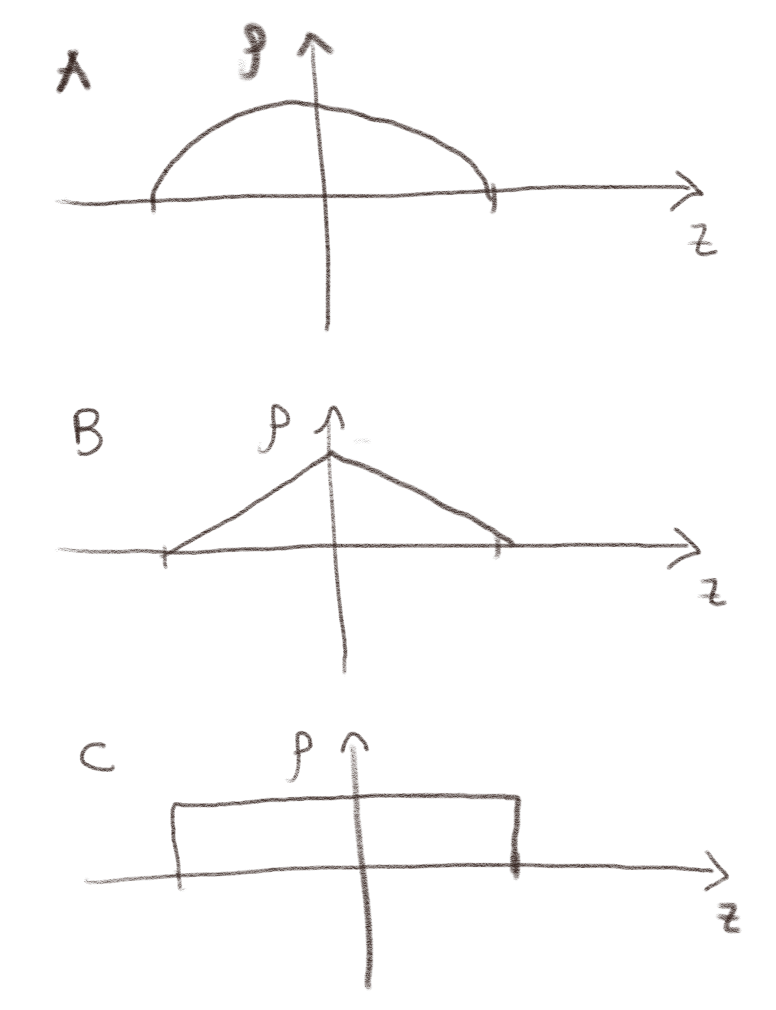 </div>

## Oppgave: Ladning fra en ladningstetthet

En romladningstetthet $\rho$ er gitt som:
$$
\begin{equation}
\rho(\vec{r}) = \left\{
\begin{array}{cc}
C & \text{ for } r<a \\ 
0 & \text{ for } r \ge a
\end{array}\right.
\end{equation}
$$


**a)**
Lag en skisse av ladningstettheten. (Vi lager alltid skisser av systemet i fysikk).

**b)**
Finn et uttrykk for ladningen som er innenfor en radius $b$ av origo?

## Oppgave: Ballong

En sfærisk ballong med radius $a$ har en ladning $+Q$.


**a)**
Hvordan kan en modell for ladningen til ballongen se ut? Hvordan vil du beskrive ladningen med en ladningstetthet?

**b)**
Hva tror du det elektriske feltet er i midten av ballongen? Begrunn svaret ditt.

## Oppgave: Lang ledning

En tynn, lang wire med linjeladningstetthet $\rho$ ligger langs $x$-aksen.

**a)**
Lag en tegning av systemet.

Vi skal finne det elektriske feltet i et punkt $\vec{r} = (0,y)$ langs $y$-aksen.

**b) (Klikkeroppgave)**
Uten å regne ut noe, hvilken vei tror du det elektriske feltet vil peke i punktet $(0,y)$?

**c) (Klikkeroppgave)**
Tegn inn et lite linjelement $d l$ av wiren i posisjonen $(x',0)$. Hva er ladningen til dette linjeelementet?

A: $\rho$ $\quad$    B: $\rho x'$ $\quad$ C: $\rho dl$
$\quad$
D: $x d \rho$
$\quad$
E: $dl d\rho$

**d) (Klikkeroppgave)**
Hva er $\vec{R}$-vektoren du trenger for å finne bidraget fra linjeelementet $d l$ til det elektriske feltet i punktet $(0,y)$?

A: $(0,y)$
$\quad$
B: $(x',0)$
$\quad$
C: $(x',y)$
$\quad$
D: $(-x',y)$
$\quad$
E: $(-x',0)$

**e) (Klikkeroppgave)**
Hva er størrelsen på bidraget $|d \vec{E}|$ til $\vec{E}$-feltet i punktet $(0,y)$ fra dette linjeelementet?

A: $\frac{1}{4 \pi \epsilon_0} \frac{\rho}{(x'^2 + y^2)}$
$\quad$
B: $\frac{1}{4 \pi \epsilon_0} \frac{\rho dl}{y^2}$
$\quad$
C: $\frac{1}{4 \pi \epsilon_0} \frac{d \rho}{(x'^2 + y^2)}$
$\quad$
D: $\frac{1}{4 \pi \epsilon_0} \frac{dl}{(x'^2 + y^2)^{1/2}}$
$\quad$
E: Ingen av disse.

**f) (Klikkeroppgave)**
Hva er $y$-komponenten, $d E_y$, til bidraget til $\vec{E}$-feltet i punktet $(0,y)$ fra dette linjeelementet?

A: $|dE|$
$\quad$
B: $|dE|x'/\sqrt{x'^2 + y^2}$
$\quad$
C: $|dE|y/\sqrt{x'^2 + y^2}$
$\quad$
D: $|dE|y/(x'^2 + y^2)$
$\quad$
E: $|dE|y/x'$

**g)**
Skriv opp integralet for å finne $\vec{E}$-feltet --- skriv det helt ut på koordinat-form eller skriv et integral for $x$- og et for $y$-komponenten.

**h)**
Hva blir $x$-komponenten av dette integralet? Alle hjelpemidler er tillatt!

**i)**
Hva blir $y$-komponenten av dette integralet? Alle hjelpemidler er tillatt!